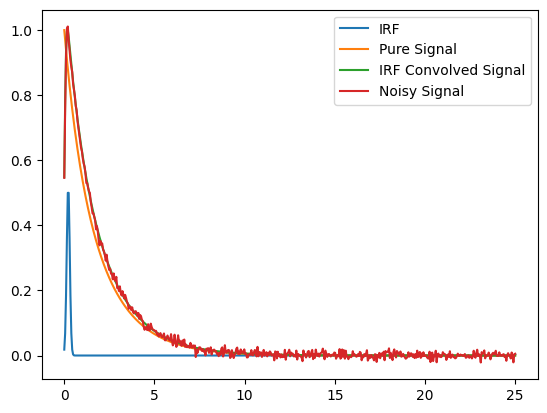

In [1]:
import matplotlib.pyplot as plt
from sim_data import *

irf, t = gaussian_irf(40, 512, 0.2) #generate gaussian irf with 0.2 ns FWHM
sig, t = gen_signal(40, 512, (0.2,0.8), (0.8,2)) # generate two component decay 
sig_irf, t = gen_signal(40, 512, (0.2, 0.8), (0.8, 2), irf) # generate decay with irf
sig_noisy = add_white_noise(sig_irf, 20) # add white noise at 20 db

#shift and scale irf for nice display:
nonZeroIdx = np.argmin(np.abs(irf[:int(len(irf)/2)] - 1/20))
irf = 0.5 * np.roll(irf, -nonZeroIdx)

plt.plot(t * 10**9, irf, label="IRF")
plt.plot(t * 10**9, sig, label="Pure Signal")
plt.plot(t * 10**9, sig_irf, label = "IRF Convolved Signal")
plt.plot(t * 10**9, sig_noisy, label = "Noisy Signal")
plt.legend()
plt.show()